In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
base = pd.read_csv("Sprint3 Diabetes.csv")

In [52]:
base.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [53]:
#utilizando o método info() para analisar cada coluna do dataset e acusar a presença de valores nulos
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [54]:
#criando matriz de correlação da base
matriz = base.corr()

In [55]:
#mostrando correlações da variável alvo,
matriz_alvo = matriz["Diabetes_012"].sort_values(ascending=False)
matriz_alvo

Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64

### Matriz de correlação geral

Na ilustração gerada abaixo, podemos observar a matriz de correlação geral, que revela o relacionamento entre cada variável individual. Quanto mais próximo de 1 o valor estiver, maior será a correlação positiva. Por outro lado, quanto mais próximo de -1, mais forte será a correlação negativa.

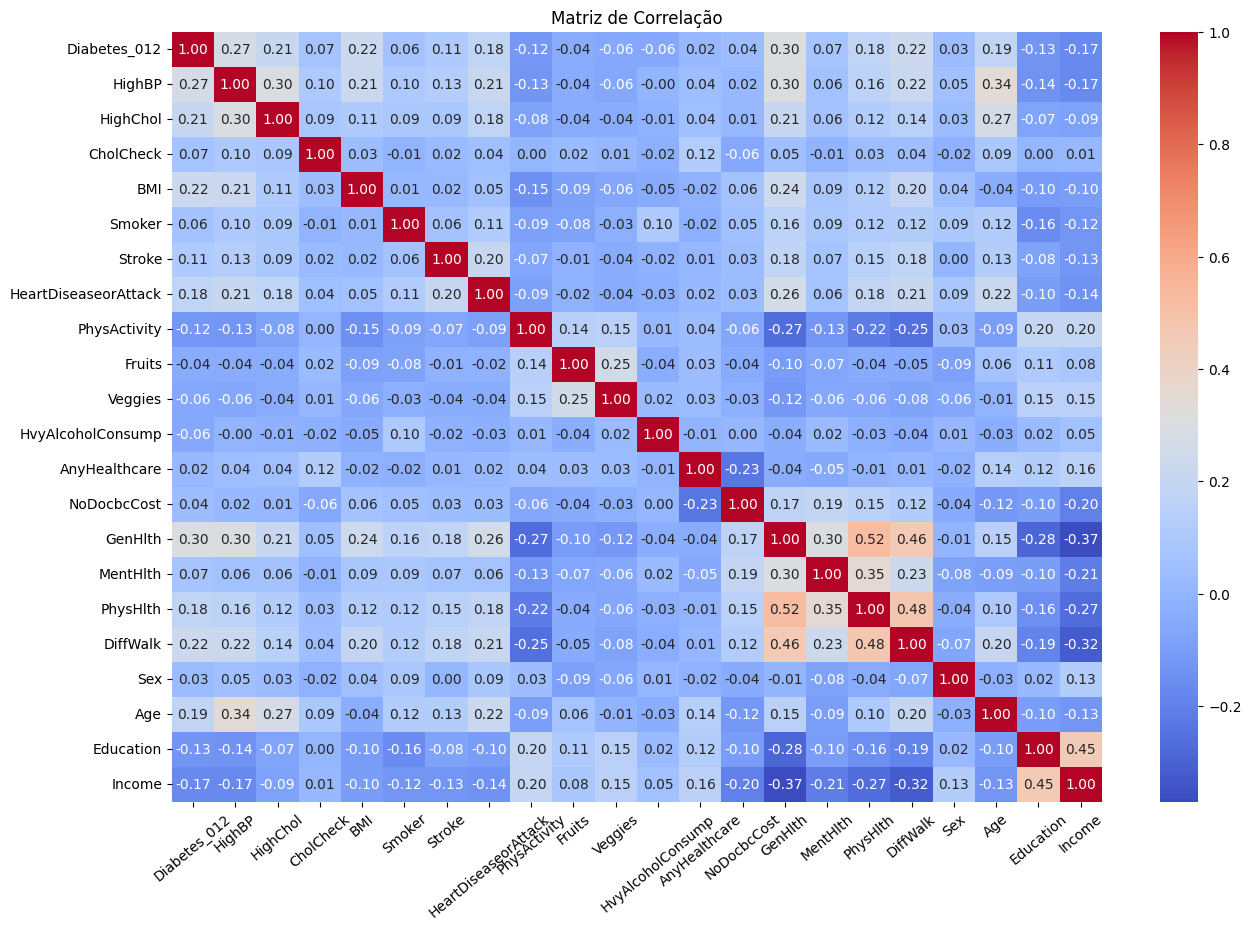

In [56]:
# Matriz de correlação geral
plt.figure(figsize=(15,10))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation = 40
           )
plt.title("Matriz de Correlação")
plt.show()


### Matriz de correlação com variável alvo

Na matriz gerada abaixo podemos observar as variáveis com uma maior correlação com a diabetes_12, posicionadas à esquerda.

- GenHlth: 0.302587
- HighBP: 0.271596
- DiffWalk: 0.224239
- BMI: 0.224379
- HeartDiseaseorAttack: 0.180272
- Age: 0.185026
- PhysHlth: 0.176287

Essas são as variáveis com maior correlação positiva com a variável diabetes_12

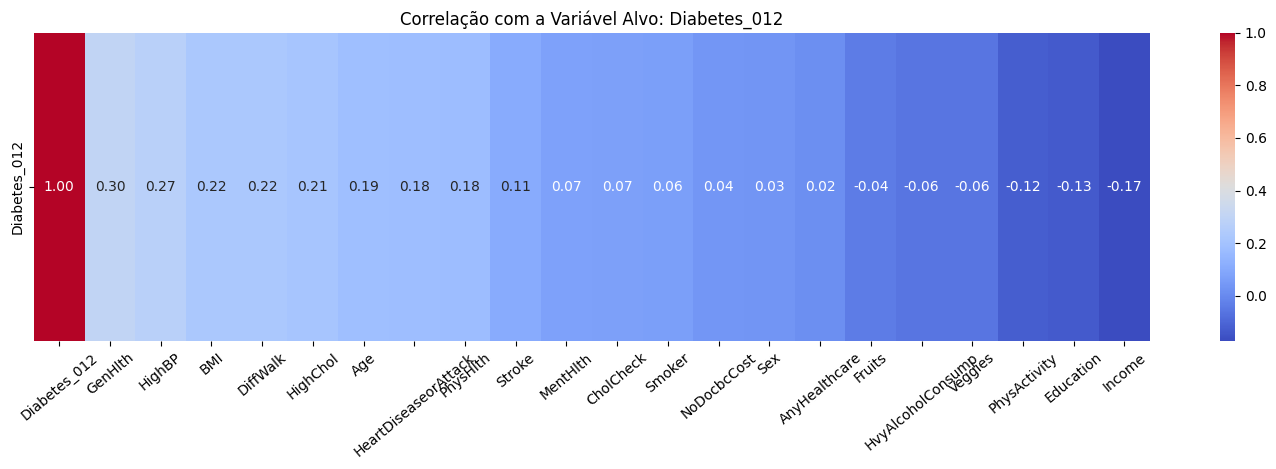

In [57]:
# Selecionar apenas as correlações com a variável alvo
corr_with_target = matriz[['Diabetes_012']].sort_values(by='Diabetes_012', ascending=False).T  # Transpor e ordenar

plt.figure(figsize=(18, 4))  # Ajuste o tamanho conforme necessário
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.xticks(rotation=40)  # Rotacionar labels do eixo x
plt.title("Correlação com a Variável Alvo: Diabetes_012")
plt.show()

In [58]:
# Selecionando variáveis com maior correlação com a diabetes_12
features = ['HighBP', 'BMI', 'PhysHlth', 'GenHlth', 'DiffWalk']  # Exemplo de variáveis significativas
X = base[features]
y = base['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

In [76]:
rf_model.accuracy = accuracy_score(y_test,y_pred)
print(f'A acurácia do modelo é de {round(rf_model.accuracy *100,2)}%')

A acurácia do modelo é de 83.97%


Text(0.5, 1.0, 'Matriz_de_Confusão')

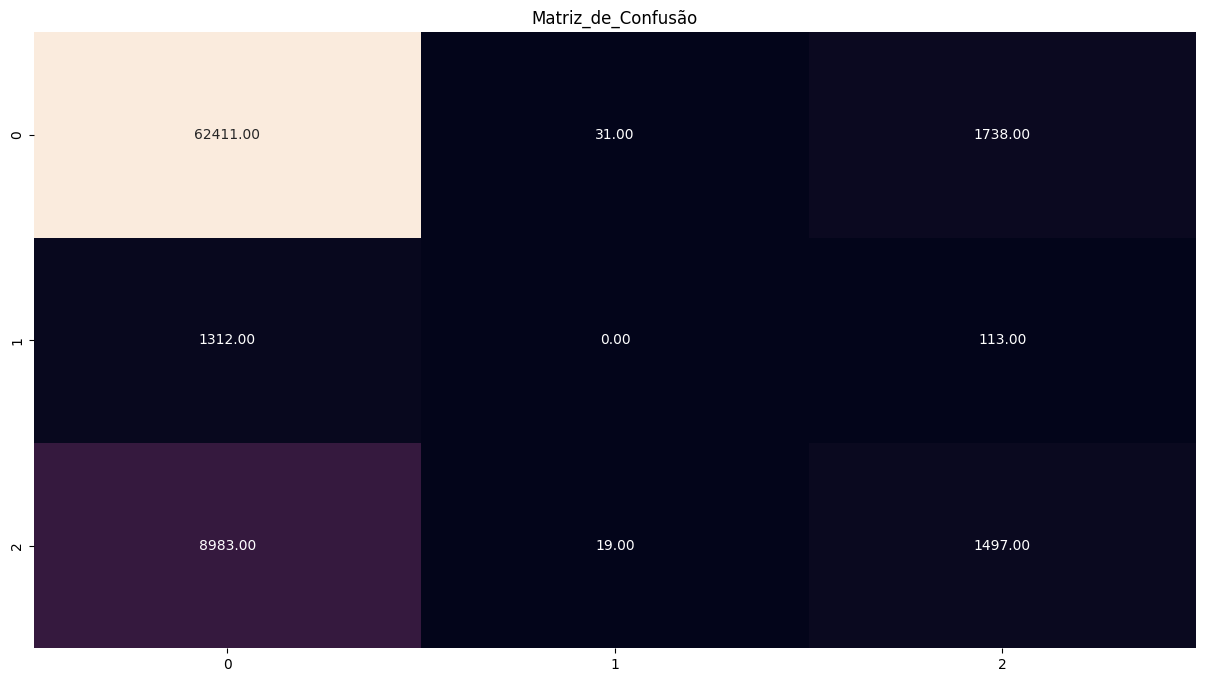

In [80]:
matriz_confusao = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(15,8))
sns.heatmap(matriz_confusao, annot=True, fmt=".2f", cbar=False)
plt.title("Matriz_de_Confusão")


### Considerações finais

Ao analisar a matriz de confusão é possível perceber que o modelo tem um bom desempenho em classificar a classe 0 com um bom número de previsões corretas e raros erros. Entretanto, os resultados demonstram que a classificação é limitada nas classes 1 e 2, com uma quantidade considerável de falsos negativos e falsos positivos.

Isso pode se dar por uma sobreposição de características dessas classes ou um desbalanceamento nos conjuntos de dados utilizados no treinamento do modelo


Além disso, também é importante mencionar que algumas variáveis contidas no dataset são de autodiagnóstivos, como a GenHlth e a Mentalhlth, o que pode causar confusão para o modelo, por se tratar de uma informação de resposta aberta.